In [1]:
import boto3
import numpy as np
import cv2
import matplotlib.pyplot as plt

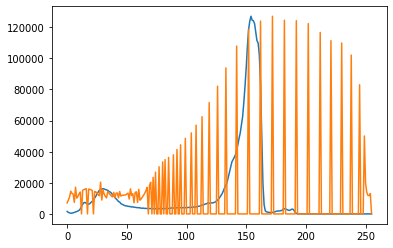

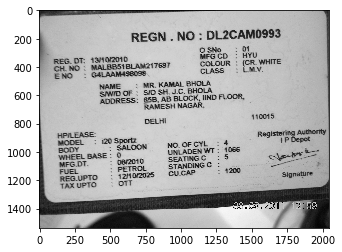

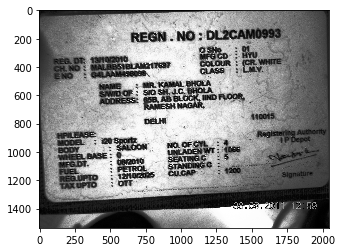

In [5]:
def hist_eq(image):
    eq_im=cv2.equalizeHist(image)
    return eq_im

#equalisation    
im=cv2.imread('C:/Users/user/spyder prog/OCR/AWS/Rekognition/txt_mudit_b8_1_513.jpg',0)
hist=cv2.calcHist([im],[0], None, [256],[0,255])
plt.plot(hist)
eq_image=hist_eq(im)
hist1=cv2.calcHist([eq_image],[0], None, [256],[0,255])
plt.plot(hist1)
plt.show()
plt.imshow(im, cmap="gray")
plt.show()
plt.imshow(eq_image, cmap="gray")
plt.show()

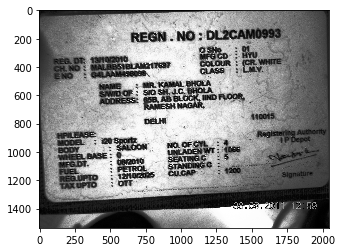

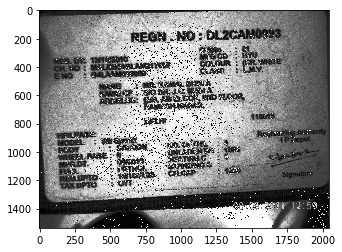

In [6]:
#sharpening the image
blur=[]
blur=np.asarray(blur)
blur=blur.astype(np.uint8)
blur=cv2.medianBlur(eq_image,3)
im1=cv2.Laplacian(blur,cv2.CV_64F)
im2=eq_image-im1
im2=im2.astype(np.uint8)
plt.imshow(eq_image, cmap="gray")
plt.show()
plt.imshow(im2, cmap="gray")
plt.show()

In [22]:
#running Rekognition on original image
s3=boto3.resource("s3")

#for bucket in s3.buckets.all():
 #   print(bucket)
    
client=boto3.client('rekognition')
response=client.detect_text(Image={'S3Object':{'Bucket':'ocrwithosho','Name':'txt_mudit_b8_1_513.jpg'}})
textDetections=response['TextDetections']
print ('Detected text\n----------')
contents=[]
for text in textDetections:
    print ('Detected text:' + text['DetectedText'])
    print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
    contents.append((text['DetectedText'],text['Confidence']))
    print ('Id: {}'.format(text['Id']))
    if 'ParentId' in text:
        print ('Parent Id: {}'.format(text['ParentId']))
    print ('Type:' + text['Type'])
    print()

print(len(textDetections))

Detected text
----------
Detected text:REGN . NO : DL2CAM0993
Confidence: 94.92%
Id: 0
Type:LINE

Detected text:O SNo 01
Confidence: 91.34%
Id: 1
Type:LINE

Detected text:REG. COLOUR (CR. WHITE
Confidence: 97.81%
Id: 2
Type:LINE

Detected text:DT: MFG CD HYU
Confidence: 98.79%
Id: 3
Type:LINE

Detected text:CH. NO G4LAAM4OAM217697 CLASS L.M.V.
Confidence: 97.95%
Id: 4
Type:LINE

Detected text:E NO
Confidence: 87.73%
Id: 5
Type:LINE

Detected text:NAME MR. KAMAL BHOLA
Confidence: 99.41%
Id: 6
Type:LINE

Detected text:SIWID OF S/O SH. J.C. BHOLA
Confidence: 95.14%
Id: 7
Type:LINE

Detected text:ADDRESS: 65B, AB BLOCK, IIND FLOOR,
Confidence: 97.42%
Id: 8
Type:LINE

Detected text:RAMESH NAGAR,
Confidence: 99.54%
Id: 9
Type:LINE

Detected text:110015
Confidence: 99.71%
Id: 10
Type:LINE

Detected text:DELHI
Confidence: 99.48%
Id: 11
Type:LINE

Detected text:HPILEASE: i20 Registering Authority
Confidence: 96.62%
Id: 12
Type:LINE

Detected text:MODEL Sportz NO. OF IP Depot
Confidence: 96.96%


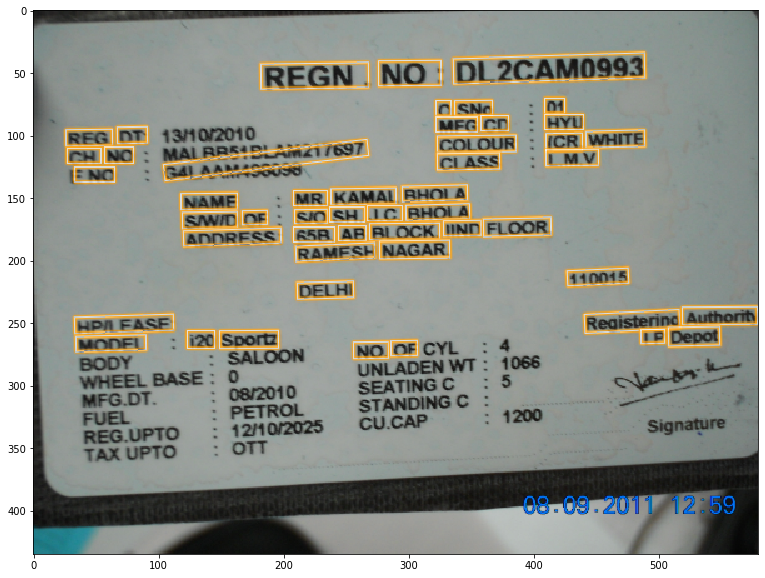

In [23]:
#bounding boxes of original image
im=cv2.imread('C:/Users/user/spyder prog/OCR/AWS/Rekognition/rekog_original.png')
plt.figure(figsize = (25,10))
plt.imshow(im,cmap="gray")
plt.show()

In [24]:
#running Rekognition on equalised image
response=client.detect_text(Image={'S3Object':{'Bucket':'ocrwithosho','Name':'eqimage.jpg'}})
textDetections=response['TextDetections']
print ('Detected text\n----------')
contents=[]
for text in textDetections:
    print ('Detected text:' + text['DetectedText'])
# =============================================================================
#     print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
#     contents.append((text['DetectedText'],text['Confidence']))
#     print ('Id: {}'.format(text['Id']))
#     if 'ParentId' in text:
#         print ('Parent Id: {}'.format(text['ParentId']))
#     print ('Type:' + text['Type'])
#     print()
# =============================================================================

print(len(textDetections))

Detected text
----------
Detected text:REGN. NO: DL2CAM0993
Detected text:O SNo 01
Detected text:DT MFG CD HYU
Detected text:REG CH. NO MALBB5IBLAM217697 COLOUR (CR. WHITE
Detected text:ENO G4LAAM4980981 CLASS LM.V.
Detected text:NAME MR. KAMAL BHOLA
Detected text:SWID OF SIO SH. J.C BHOLA IIND FLOOR
Detected text:ADDRESS: 65B, AB BLOCK.
Detected text:RAMESH NAGAR,
Detected text:110015
Detected text:DELHI
Detected text:HPILEASE Registering Authority
Detected text:MODEL 120 Sporiz IP Depot
Detected text:NO.
Detected text:REGN.
Detected text:NO:
Detected text:DL2CAM0993
Detected text:O
Detected text:SNo
Detected text:01
Detected text:MFG
Detected text:CD
Detected text:HYU
Detected text:REG
Detected text:DT
Detected text:COLOUR
Detected text:(CR.
Detected text:WHITE
Detected text:CH.
Detected text:NO
Detected text:MALBB5IBLAM217697
Detected text:CLASS
Detected text:LM.V.
Detected text:ENO
Detected text:G4LAAM4980981
Detected text:NAME
Detected text:MR.
Detected text:KAMAL
Detected text:BH

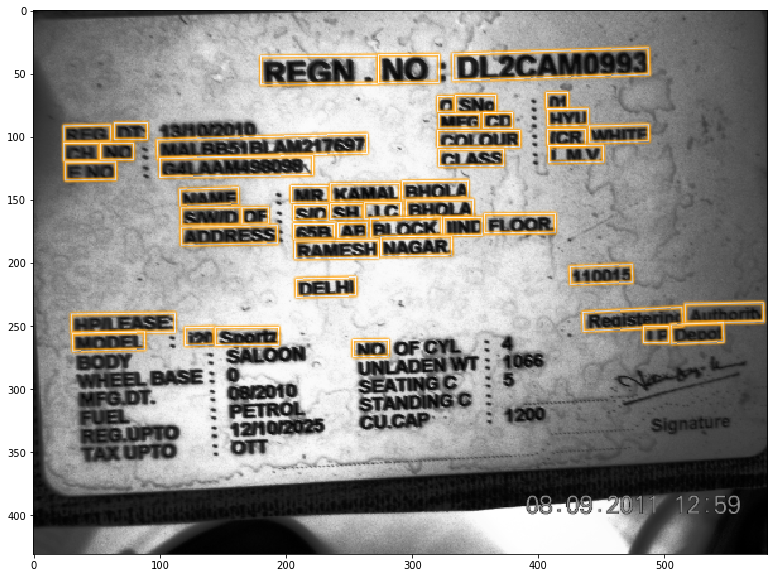

In [25]:
#bounding boxes of equalised image
im=cv2.imread('C:/Users/user/spyder prog/OCR/AWS/Rekognition/rekog_equalised.png')
plt.figure(figsize = (25,10))
plt.imshow(im,cmap="gray")
plt.show()

In [26]:
#running Rekognition on sharpened image
response=client.detect_text(Image={'S3Object':{'Bucket':'ocrwithosho','Name':'eqsharpenedimage.jpg'}})
textDetections=response['TextDetections']
print ('Detected text\n----------')
contents=[]
for text in textDetections:
    print ('Detected text:' + text['DetectedText'])
# =============================================================================
#     print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
#     contents.append((text['DetectedText'],text['Confidence']))
#     print ('Id: {}'.format(text['Id']))
#     if 'ParentId' in text:
#         print ('Parent Id: {}'.format(text['ParentId']))
#     print ('Type:' + text['Type'])
#     print()
# =============================================================================

print(len(textDetections))

Detected text
----------
Detected text:REGN. NO: DL2CAM0993
Detected text:01
Detected text:OSNO
Detected text:CHNO 13M960AN217637 COLOUR ICR. WHITE
Detected text:REG DI MRO CD HYU
Detected text:ENO GALAAN49SO9 CLASS LMV.
Detected text:NAME MR KAANAL JC BIOLA
Detected text:BHOLA
Detected text:SNIDOF SH,. AB BLOCK BEND FLOOR
Detected text:ADDRESS RAMESH INAGAR
Detected text:$10015
Detected text:DIELAI
Detected text:HPNEASE Registering Authority
Detected text:MNODAL 120 Smon SALOON NDOFCVL IP Depot
Detected text:BODY UNLADANWT A0
Detected text:WHEALBASE
Detected text:REGN.
Detected text:NO:
Detected text:DL2CAM0993
Detected text:OSNO
Detected text:01
Detected text:MRO
Detected text:CD
Detected text:HYU
Detected text:REG
Detected text:DI
Detected text:13M960AN217637
Detected text:COLOUR
Detected text:ICR.
Detected text:WHITE
Detected text:CHNO
Detected text:CLASS
Detected text:LMV.
Detected text:ENO
Detected text:GALAAN49SO9
Detected text:MR
Detected text:KAANAL
Detected text:BHOLA
Detecte

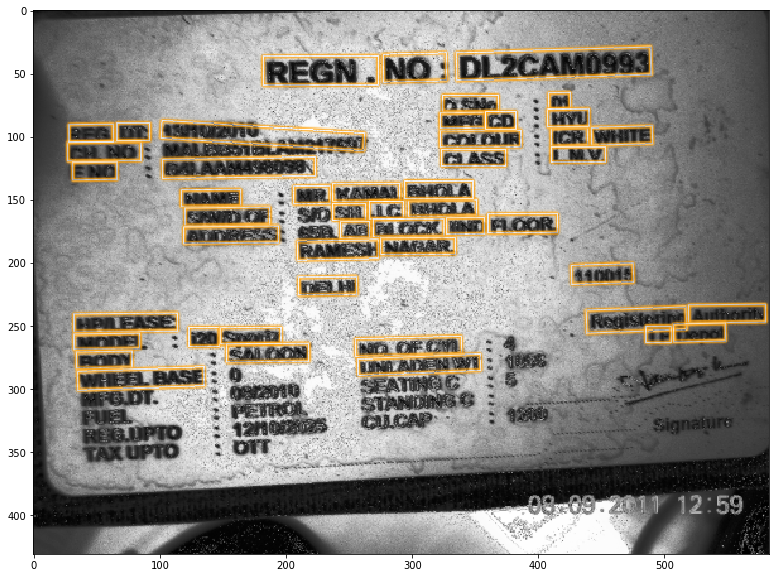

In [27]:
#bounding boxes of sharpened image
im=cv2.imread('C:/Users/user/spyder prog/OCR/AWS/Rekognition/rekog_sharpened.png')
plt.figure(figsize = (25,10))
plt.imshow(im,cmap="gray")
plt.show()